In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [7]:
df = pd.read_csv('unall.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14950 entries, 0 to 14949
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       14950 non-null  float64
 1   B       14950 non-null  float64
 2   C       14950 non-null  float64
 3   D       14950 non-null  float64
 4   E       14950 non-null  float64
 5   F       14950 non-null  float64
 6   G       14950 non-null  float64
 7   H       14950 non-null  float64
dtypes: float64(8)
memory usage: 934.5 KB


In [9]:
df.head()

,A,B,C,D,E,F,G,H
0,-9.160867,2.062130,4.837712,-4.346400,2.946743,0.603092,-8.299990,-8.165439
1,-0.231103,1.280835,-9.236738,-6.957041,3.804968,6.230847,-2.914726,8.033090
2,-9.048888,1.522202,5.120447,-4.911565,1.682313,0.114039,-8.477866,-7.879890
3,2.875032,-6.874256,1.354997,-2.420766,-7.512797,5.867499,8.617150,-4.975955
4,3.893718,-5.383670,1.013762,-3.266091,-5.721458,5.986232,9.082322,-4.018635


In [10]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=3)

In [13]:
kmeans.fit(df)

KMeans(n_clusters=3)

In [16]:
kmeans.predict([[1,2,3,4,56,6,7,8]])

/Users/igal.nir/opt/anaconda3/envs/ds009/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [17]:
kmeans.cluster_centers_

array([[-8.31821248,  2.08027592,  4.5800723 , -4.48649629,  3.68890015,
         0.34085028, -9.02460214, -7.25444951],
       [ 4.43786571, -6.18676545,  1.07462692, -2.9622927 , -6.35467402,
         5.71389715,  9.32984445, -5.3703528 ],
       [ 0.33668422,  1.40613324, -9.44534503, -6.58114599,  3.70570442,
         6.69023167, -3.8540745 ,  7.88929041]])

In [18]:
dftest = pd.read_csv('un_test.csv')

In [19]:
dftest.head()

,A,B,C,D,E,F,G,H
0,-8.394198,2.130580,4.550989,-3.985735,3.675691,0.037279,-9.610096,-5.409832
1,4.952155,-6.417093,1.529750,-3.416331,-7.892094,5.861197,10.167782,-5.014432
2,0.712611,2.526579,-8.992137,-6.231673,4.253149,7.303107,-4.525618,7.960269
3,-8.711706,2.744574,4.786655,-4.568053,2.750779,0.306981,-8.467796,-8.006584
4,3.182528,-5.604574,2.234331,-2.845613,-5.954910,4.068180,9.842163,-6.777029


In [20]:
def k_mean_distance(samp,cent):
        s = 0
        for i in range(len(samp)):
            s += ((samp[i]-cent[i])**2)
        return np.sqrt(s)

In [22]:
s = dftest.iloc[2,:].values

In [23]:
s

array([ 0.71261085,  2.5265786 , -8.99213715, -6.23167263,  4.25314857,
        7.3031071 , -4.52561755,  7.960269  ])

In [24]:
print(k_mean_distance(s,kmeans.cluster_centers_[0]))
print(k_mean_distance(s,kmeans.cluster_centers_[1]))
print(k_mean_distance(s,kmeans.cluster_centers_[2]))

23.86473097039978
26.202275961416607
1.689842321386629


In [28]:
###########################
# how to get those distances from sklean?

In [26]:
kmeans.transform(s.reshape(1, -1))

/Users/igal.nir/opt/anaconda3/envs/ds009/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([[23.86473097, 26.20227596,  1.68984232]])

In [ ]:
#################################################

In [27]:
kmeans.predict(s.reshape(1,-1))

/Users/igal.nir/opt/anaconda3/envs/ds009/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [29]:
s = dftest.iloc[22,:].values
s

array([-6.60915229,  9.83777338,  0.93345454,  1.81839482,  3.79379379,
        0.93376324,  9.10384722,  4.96225064])

In [30]:
print(k_mean_distance(s,kmeans.cluster_centers_[0]))
print(k_mean_distance(s,kmeans.cluster_centers_[1]))
print(k_mean_distance(s,kmeans.cluster_centers_[2]))

24.380322267368264
25.18634951481032
22.52174399298306


In [31]:
kmeans.predict(s.reshape(1,-1))

/Users/igal.nir/opt/anaconda3/envs/ds009/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [101]:
#############################################
# build basic anomaly detection mechanism, 
# for marking around X% of the test set as suspected 
# 1. a point in the test set considered to be suspected if
#    it is far at least D from each centroid (make D= 0..40)
# 2. plot sensitivity analysis -> % of suspected (#suspected/#total) Vs. D
# 3. find D that yields 25% suspected points

In [33]:
dftest[1:6]

,A,B,C,D,E,F,G,H
1,4.952155,-6.417093,1.529750,-3.416331,-7.892094,5.861197,10.167782,-5.014432
2,0.712611,2.526579,-8.992137,-6.231673,4.253149,7.303107,-4.525618,7.960269
3,-8.711706,2.744574,4.786655,-4.568053,2.750779,0.306981,-8.467796,-8.006584
4,3.182528,-5.604574,2.234331,-2.845613,-5.954910,4.068180,9.842163,-6.777029
5,4.660475,-5.623960,0.274037,-2.519978,-6.045869,5.206959,9.079354,-5.319763


In [34]:
kmeans.transform(dftest)[1:6]

array([[28.22616872,  1.98620423, 26.67000096],
       [23.86473097, 26.20227596,  1.68984232],
       [ 1.54997191, 26.54971601, 24.61483625],
       [25.74097472,  2.89529842, 26.65536312],
       [26.4603799 ,  1.27300541, 24.86207543]])

In [54]:
a = np.min(kmeans.transform(dftest)[1:6], axis=1)
a

array([1.98620423, 1.68984232, 1.54997191, 2.89529842, 1.27300541])

In [37]:
D= 1.7

In [39]:
b = (a >= 1.7)

In [40]:
b

array([ True, False, False,  True, False])

In [41]:
len(b)

5

In [44]:
sum(b)

2

In [46]:
p = sum(b)/len(b)
p

0.4

In [43]:
np.where(a>=1.7)

(array([0, 3]),)

In [50]:
p = []
max_d = np.linspace(0, 40, 3000)
res = kmeans.transform(dftest)
mins = np.min(res, axis=1)
for d in max_d:
    b = (mins >= d)
    curr_p = sum(b)/len(b)
    p.append(curr_p)
# print(p)

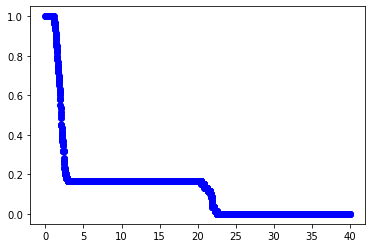

In [52]:
plt.plot(max_d, p, "bo-")

In [55]:
dd = pd.DataFrame()

In [56]:
dd['max_d'] = max_d
dd['p'] = p

In [57]:
dd

,max_d,p
0,0.000000,1.0
1,0.013338,1.0
2,0.026676,1.0
3,0.040013,1.0
4,0.053351,1.0
...,...,...
2995,39.946649,0.0
2996,39.959987,0.0
2997,39.973324,0.0
2998,39.986662,0.0


In [58]:
dd[dd.p < 0.28]

,max_d,p
183,2.440814,0.266667
184,2.454151,0.266667
185,2.467489,0.266667
186,2.480827,0.250000
187,2.494165,0.233333
...,...,...
2995,39.946649,0.000000
2996,39.959987,0.000000
2997,39.973324,0.000000
2998,39.986662,0.000000
